In [1]:
import numpy as np
from scipy import optimize
from scipy.stats import linregress
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

import os
import glob
from collections import defaultdict

import pandas as pd

In [3]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def ax(x, a):
    return a*x

In [4]:
folder_with_data = 'Tension_x'

In [5]:
#Нахожу def1.txt файлы во всех папках p_N:
collected_data = defaultdict(list)

for f in glob.glob(f'./{folder_with_data}/*_*/def1.txt'):
    print(f)
    
    pressure = f.split('\\')[1].split('_')[0]     

    df_Strain_and_Stress = pd.read_csv(
        f,
        skiprows=1,
        header=None,
        sep='\s+',
        engine='python'
    )

    df_Strain_and_Stress.columns = ['deformation', 'sx', 'sy', 'sz']

    collected_data[pressure].append(df_Strain_and_Stress)

In [137]:
collected_data = {k: pd.concat(df_list, axis=0) for k, df_list in collected_data.items()}

<AxesSubplot:xlabel='deformation', ylabel='sx'>

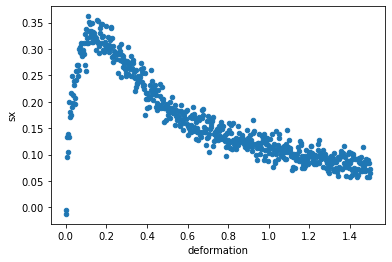

In [138]:
#Рисую график Деформация - Напряжение по всем точкам для данного давления:
collected_data['44000'].plot(kind='scatter', x='deformation', y='sx')

In [139]:
df = collected_data['44000']

In [140]:
df

,deformation,sx,sy,sz
0,5.392362e-16,-0.004496,0.000536,0.014170
1,5.000000e-03,0.133393,0.082291,0.065527
2,1.000000e-02,0.104273,0.038766,0.071412
3,1.500000e-02,0.198819,0.098255,0.071611
4,2.000000e-02,0.172053,0.056615,0.055078
...,...,...,...,...
296,1.480000e+00,0.071698,0.023440,0.036892
297,1.485000e+00,0.056893,0.025436,0.030801
298,1.490000e+00,0.084693,0.017487,0.049668
299,1.495000e+00,0.084585,0.005146,0.027637


In [141]:
deformation_range = (0, 0.16)
d_range = np.linspace(0, max(deformation_range) + 0.1, 50)
x = df[df['deformation'] <= max(deformation_range)]['deformation']
y = df[df['deformation'] <= max(deformation_range)]['sx']

slope, pcov = curve_fit(ax, x, y)
R2 = r2_score(y, slope*x)

slope, R2


# linefit = linregress(x, y)
# intercept, slope, R2 = linefit.intercept, linefit.slope, linefit.rvalue**2
# intercept, slope, R2

(array([2.88630501]), -0.11158603649827326)

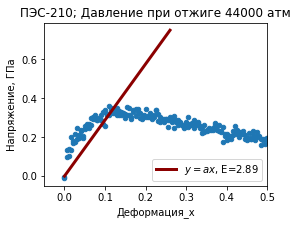

In [142]:
#Рисую график с линией тренда до 16% деформации:
df.plot.scatter(x='deformation', y='sx', figsize=(4, 3))
plt.plot(d_range, slope*d_range, 'darkred', label=f'$y=ax$, E={slope[0]:.2f}', lw=3)
# plt.plot(d_range, intercept + slope*d_range, 'darkred', label=f'linear fit; $R^2$={R2:.3f}', lw=3)
plt.xlim(-0.05, 0.5)
plt.xlabel('Деформация_x')
plt.ylabel('Напряжение, ГПа')
plt.title('ПЭС-210; Давление при отжиге 44000 атм')
plt.legend()